In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [3]:
# Step 2: Load the dataset

data = fetch_20newsgroups(subset='all')
X = data.data
y = data.target

In [4]:
# Step 3: Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [5]:
# Step 4: Create a pipeline (Vectorizer + Classifier)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
# Step 5: Train the model

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [7]:
# Step 6: Make predictions on the test data

y_pred = model.predict(X_test)

In [8]:
# Step 7: Evaluate the model

print('Accuracy: ', accuracy_score(y_test, y_pred))
print("Classification Report; ", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy:  0.8474801061007957
Classification Report;                            precision    recall  f1-score   support

             alt.atheism       0.85      0.74      0.79       151
           comp.graphics       0.88      0.80      0.84       202
 comp.os.ms-windows.misc       0.89      0.81      0.85       195
comp.sys.ibm.pc.hardware       0.63      0.86      0.72       183
   comp.sys.mac.hardware       0.96      0.83      0.89       205
          comp.windows.x       0.96      0.82      0.89       215
            misc.forsale       0.96      0.62      0.75       193
               rec.autos       0.88      0.93      0.90       196
         rec.motorcycles       0.89      0.95      0.92       168
      rec.sport.baseball       0.96      0.95      0.95       211
        rec.sport.hockey       0.91      0.98      0.94       198
               sci.crypt       0.80      0.97      0.88       201
         sci.electronics       0.92      0.80      0.85       202
                 sci.

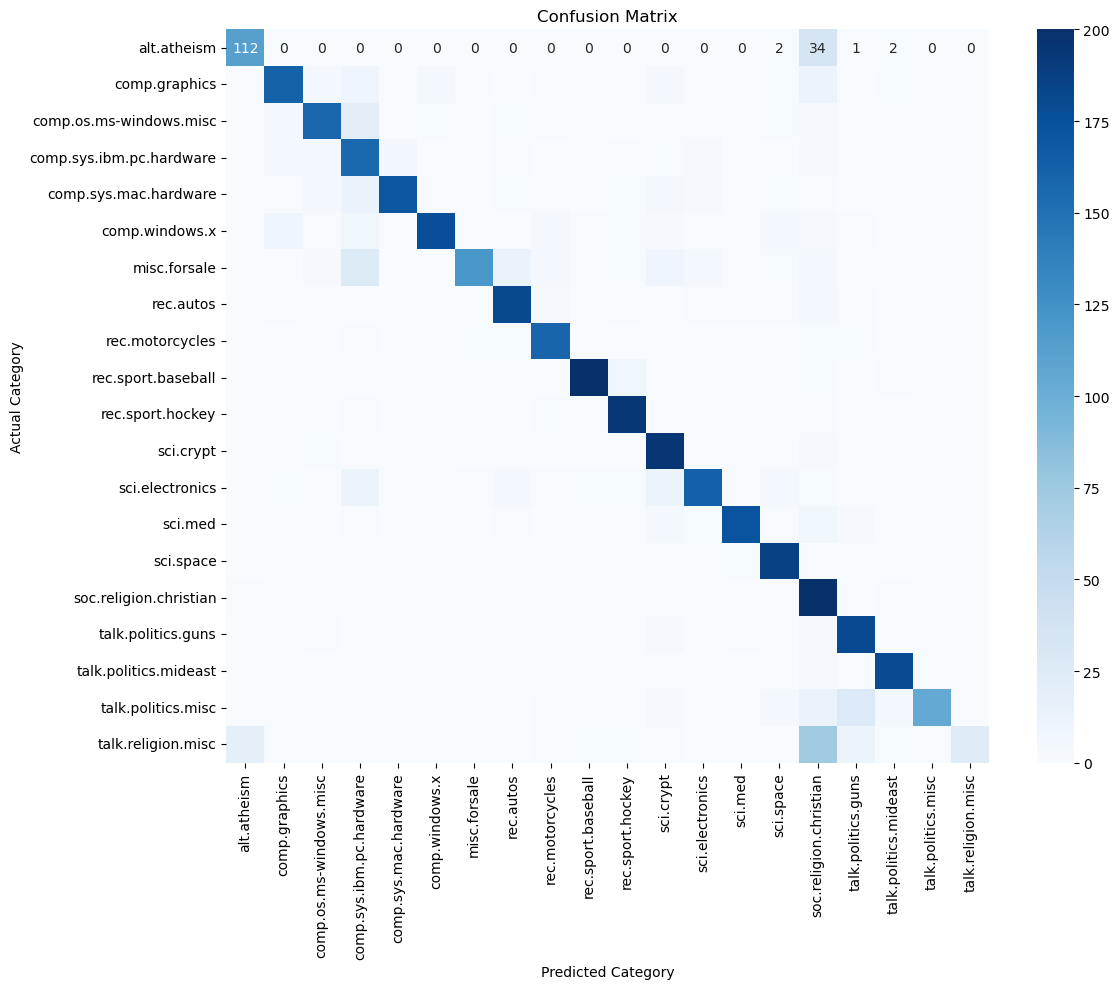

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()